# Problem Statement

We humans have been using glass since ancient times for a variety of applications from building construction to making decorative objects. With technology, glass and its applications have evolved, and today, we have different varieties of glass used for very different purposes from a computer monitor to a bulletproof car window depending on the grade of the glass produced. And not all grades or varieties are manufactured the same way. In this data science challenge, you as a data scientist must use the given data to predict the grade of the glass produced based on the given factors.

Given are 15 distinguishing factors that can provide insight into what grade of the glass is being produced. Your objective as a data scientist is to build a machine learning model that can predict the grade of glass based on the given factors.

# Phase1: Model Building On Training Data

# Step1: Read Data

In [1]:
train = pd.read_csv("Train.csv")
train.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [2]:
train.shape

(1358, 16)

In [3]:
train.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5', 'class'],
      dtype='object')

# Step2: Exploratory Data Analysis

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

## 2.1 Missing Data Analysis 

In [4]:
train.isnull().sum()

grade_A_Component_1    0
grade_A_Component_2    0
max_luminosity         0
thickness              0
xmin                   0
xmax                   0
ymin                   0
ymax                   0
pixel_area             0
log_area               0
x_component_1          0
x_component_2          0
x_component_3          0
x_component_4          0
x_component_5          0
class                  0
dtype: int64

## 2.2 Data Type Analysis 

In [5]:
train.dtypes

grade_A_Component_1      int64
grade_A_Component_2      int64
max_luminosity           int64
thickness                int64
xmin                     int64
xmax                     int64
ymin                     int64
ymax                     int64
pixel_area               int64
log_area               float64
x_component_1            int64
x_component_2            int64
x_component_3            int64
x_component_4            int64
x_component_5            int64
class                    int64
dtype: object

## 2.3 Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

<b> Continuous Variables:- </b> In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram and Bar plots: 

In [6]:
train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


### 2.3.1 Box Plot of CONTINUOUS variables 

In [7]:
train.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5', 'class'],
      dtype='object')

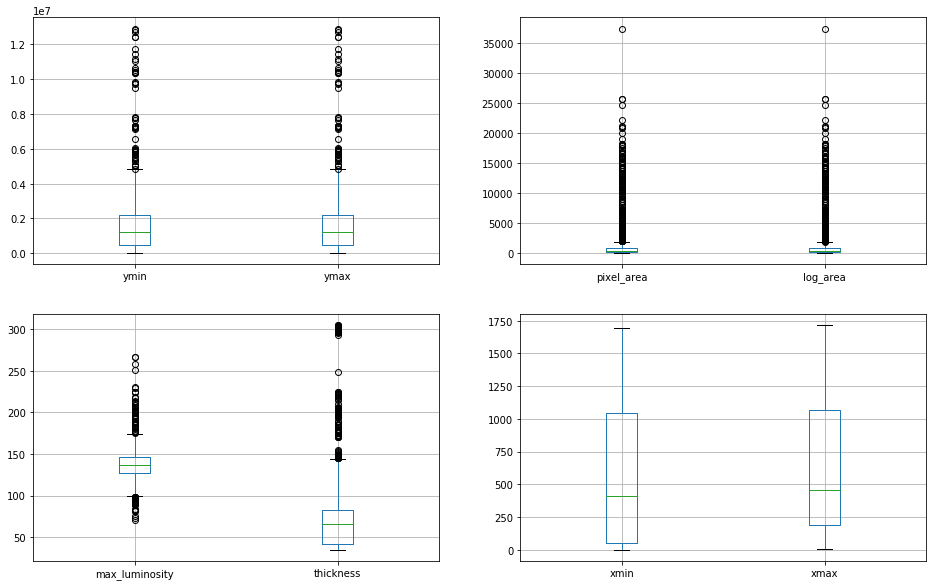

In [8]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
train.boxplot(column=['ymin', 'ymax'])

plt.subplot(2,2,2)
train.boxplot(column=['pixel_area', 'log_area'])

plt.subplot(2,2,3)
train.boxplot(column=['max_luminosity', 'thickness'])

plt.subplot(2,2,4)
train.boxplot(column=['xmin', 'xmax'])


<b> From the plots we can see that, there are lots of outliers in each varibale. </b>

### 2.3.2 Plot for Continuous variables

### 2.3.3 Histogram Plots Of Continuous Variables 

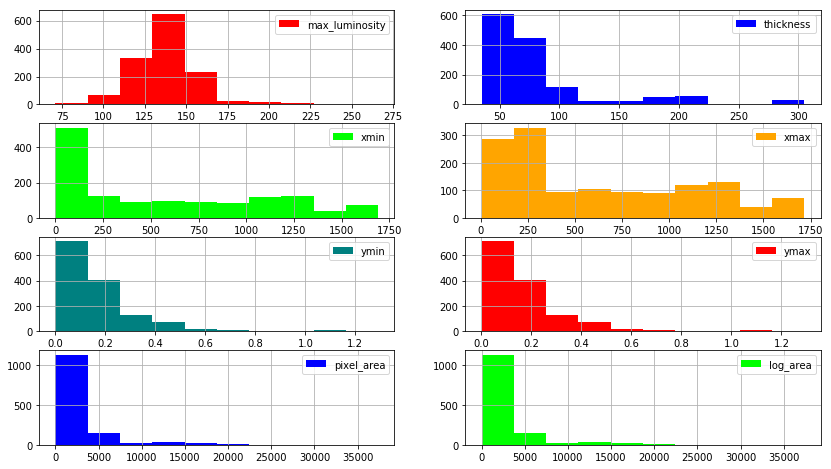

In [9]:
plt.figure(figsize=(14,8))
clr=['red','blue','lime','orange','teal','red','blue','lime']
columns = ['max_luminosity', 'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area']
for i,j in zip(range(1,9),columns):
    plt.subplot(4,2,i)
    train[j].hist(color = clr[i-1], label=j)
    plt.legend()
    

### 2.3.4 Density Plots Of Continuous Variables 

<Figure size 1008x576 with 0 Axes>

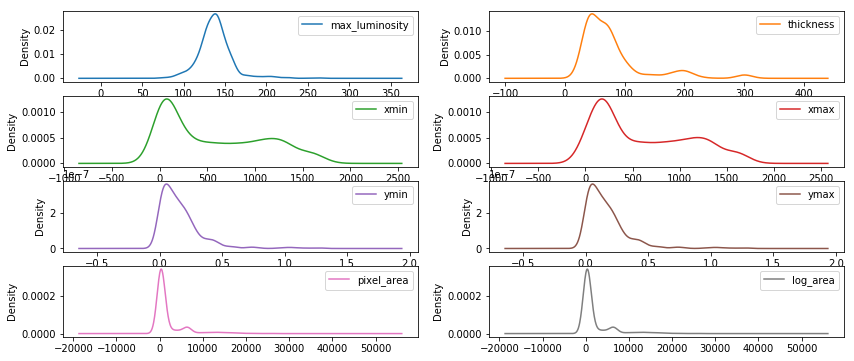

In [10]:
plt.figure(figsize=(14,8))
train[columns].plot(kind='density', subplots=True, 
                                                    layout=(4,2), sharex=False,
                                                    sharey=False, figsize=(14,6))
plt.show()

### 2.3.5 Discrete Variables Plot

In [11]:
train.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5', 'class'],
      dtype='object')

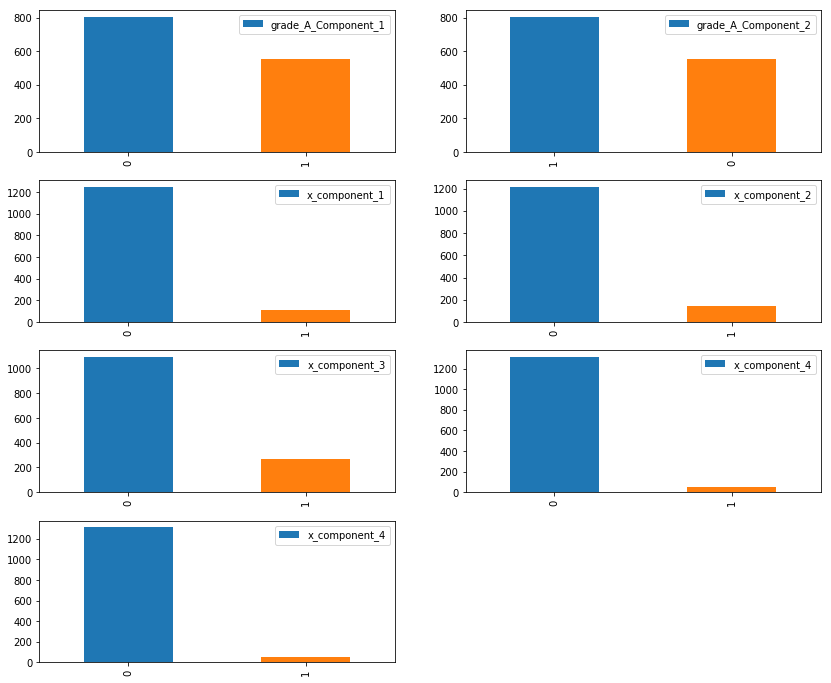

In [12]:
plt.figure(figsize=(14,12))

plt.subplot(4,2,1)
train.grade_A_Component_1.value_counts().plot(kind='bar', label = 'grade_A_Component_1')
plt.legend()

plt.subplot(4,2,2)
train.grade_A_Component_2.value_counts().plot(kind='bar', label = 'grade_A_Component_2')
plt.legend()

plt.subplot(4,2,3)
train.x_component_1.value_counts().plot(kind='bar', label = 'x_component_1')
plt.legend()

plt.subplot(4,2,4)
train.x_component_2.value_counts().plot(kind='bar', label = 'x_component_2')
plt.legend()

plt.subplot(4,2,5)
train.x_component_3.value_counts().plot(kind='bar', label = 'x_component_3')
plt.legend()

plt.subplot(4,2,6)
train.x_component_4.value_counts().plot(kind='bar', label = 'x_component_4')
plt.legend()

plt.subplot(4,2,7)
train.x_component_4.value_counts().plot(kind='bar', label = 'x_component_4')
plt.legend()


### 2.3.5 Target Variable Plot

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


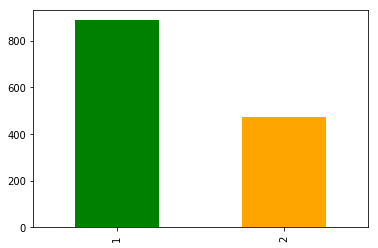

In [13]:
train['class'].value_counts().plot(kind='bar', colors=['green', 'orange'])

In [14]:
train['class'].value_counts()

1    887
2    471
Name: class, dtype: int64

# 2.4 Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

In [15]:
train.dtypes

grade_A_Component_1      int64
grade_A_Component_2      int64
max_luminosity           int64
thickness                int64
xmin                     int64
xmax                     int64
ymin                     int64
ymax                     int64
pixel_area               int64
log_area               float64
x_component_1            int64
x_component_2            int64
x_component_3            int64
x_component_4            int64
x_component_5            int64
class                    int64
dtype: object

### 2.4.1 Correlation Matrix Plot

In [16]:
plt.figure(figsize=(20,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

<Figure size 1440x576 with 0 Axes>

### 2.4.2 Scatterplot Matrix

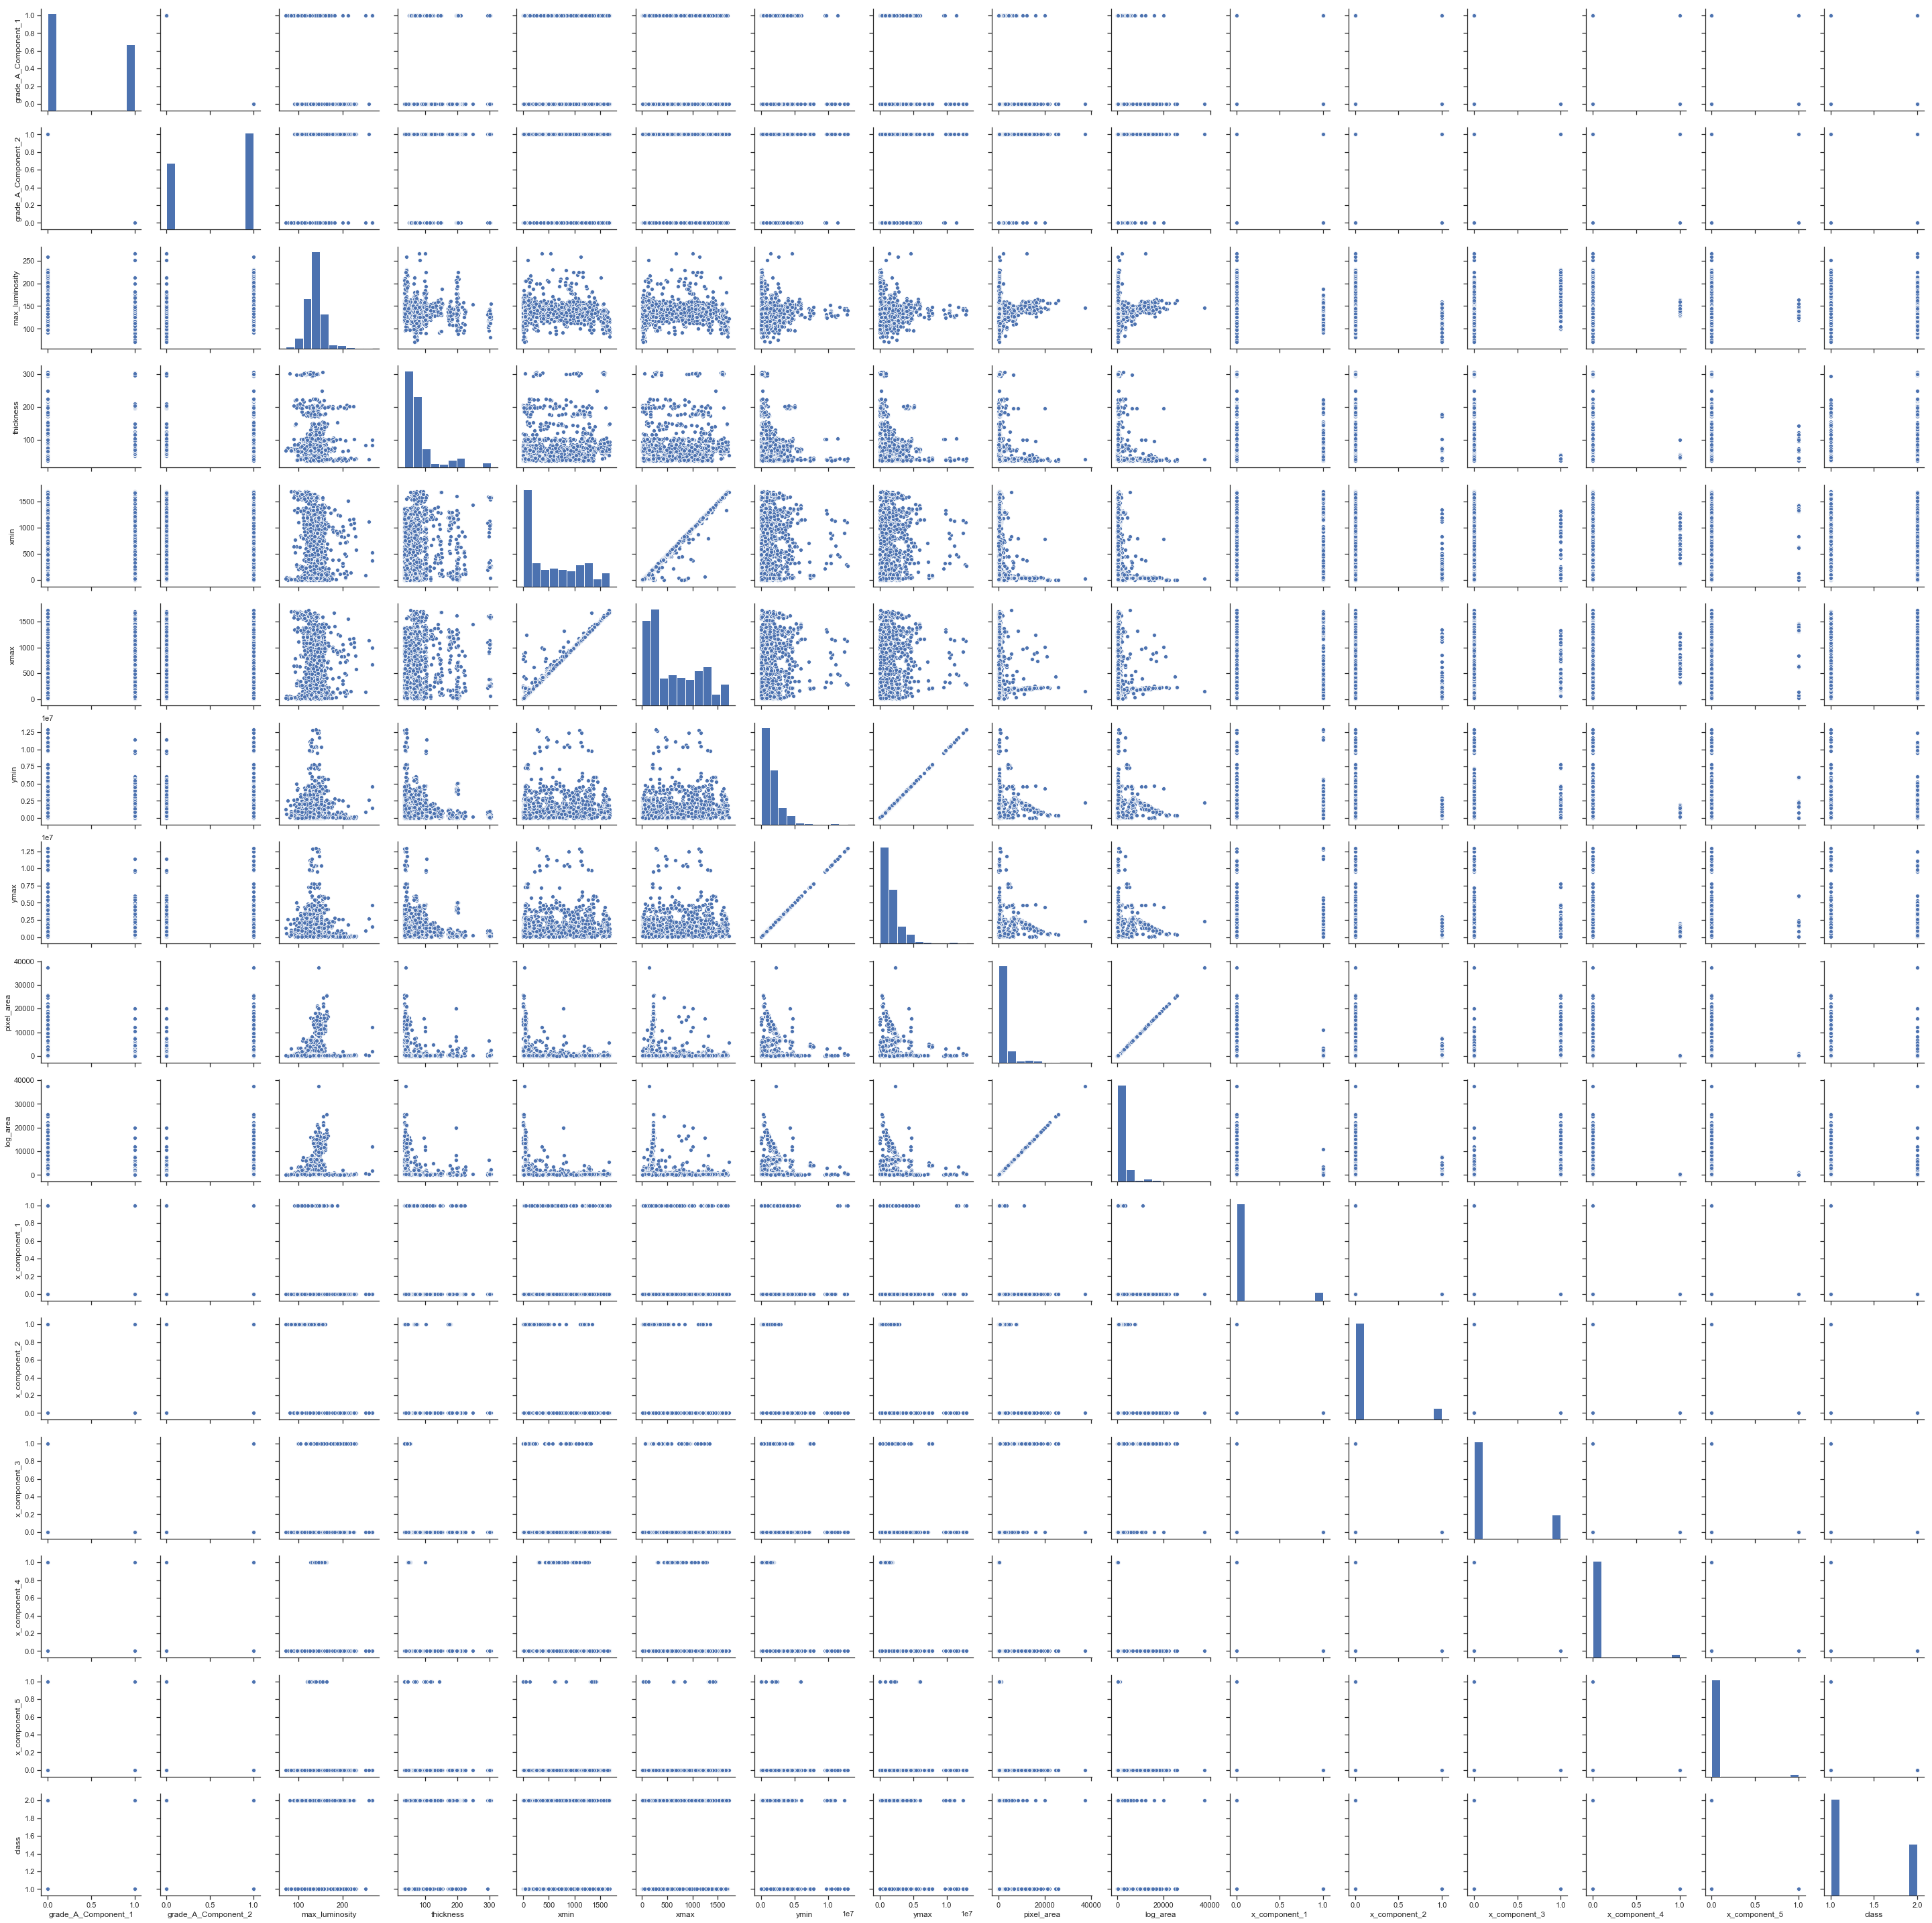

In [17]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train)

# Step4: Separating X and Y

In [18]:
train.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5', 'class'],
      dtype='object')

## 4.1 Re-setting Index Before Splitting

In [19]:
train.reset_index(drop=True, inplace=True)

## 4.2 Split Data

In [20]:
x = train.drop(['class'], axis=1)
y = train['class']

In [21]:
x_copy = x.copy()

## 4.3 New Variables Creation

In [22]:
'''from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_copy[['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results']])
'''

"from sklearn.preprocessing import PolynomialFeatures\n\npolynomial_features= PolynomialFeatures(degree=2)\nx_poly = polynomial_features.fit_transform(x_copy[['City', 'Location_Score', 'Internal_Audit_Score',\n       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results']])\n"

In [23]:
'''x_poly.shape'''

'x_poly.shape'

In [24]:
'''x_poly'''

'x_poly'

### 4.3.2 Plotting Newly Created Variables

In [25]:
'''plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','indigo','teal',
    'red','blue','green','pink','lime','orange','indigo','teal']
cols = ['elevation_complaints_ratio', 'elevation_violation_ratio', 'avg_adv_weather_metric',
        'adv_weather_metric_violation_ratio', 'avg_safety_score', 'safety_control_ratio', 
        'safety_turbulence_ratio', 'avg_complaints', 'avg_control_metric', 'avg_turbulence', 
        'avg_cabin_temp', 'avg_elevation', 'avg_violation', 'Total_Safety_Complaints_control_ratio',
        'Turbulence_In_gforces_Total_Safety_Complaints_ratio', 'Violations_Total_Safety_Complaints_ratio']

for i,j in zip(range(1,17),cols):
    plt.subplot(4,4,i)
    train_deduplicated[j].hist(color = clr[i-1], label=j)
    plt.legend()'''

"plt.figure(figsize=(14,10))\nclr=['red','blue','green','pink','lime','orange','indigo','teal',\n    'red','blue','green','pink','lime','orange','indigo','teal']\ncols = ['elevation_complaints_ratio', 'elevation_violation_ratio', 'avg_adv_weather_metric',\n        'adv_weather_metric_violation_ratio', 'avg_safety_score', 'safety_control_ratio', \n        'safety_turbulence_ratio', 'avg_complaints', 'avg_control_metric', 'avg_turbulence', \n        'avg_cabin_temp', 'avg_elevation', 'avg_violation', 'Total_Safety_Complaints_control_ratio',\n        'Turbulence_In_gforces_Total_Safety_Complaints_ratio', 'Violations_Total_Safety_Complaints_ratio']\n\nfor i,j in zip(range(1,17),cols):\n    plt.subplot(4,4,i)\n    train_deduplicated[j].hist(color = clr[i-1], label=j)\n    plt.legend()"

# Step5: Creating Train and Test Set In Ratio 80:20

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# Step6: Model Building

## 6.1 Identification Of Best Features

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(x, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


df_feat = pd.DataFrame(fit.ranking_, x.columns)
df_feat.rename(columns = {0:"Feature_Ranking"}, inplace=True)


C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Num Features: 3
Selected Features: [False False  True  True  True False False False False False False False
 False False False]
Feature Ranking: [11 10  1  1  1  2  5  6  4  3  9  8  7 12 13]


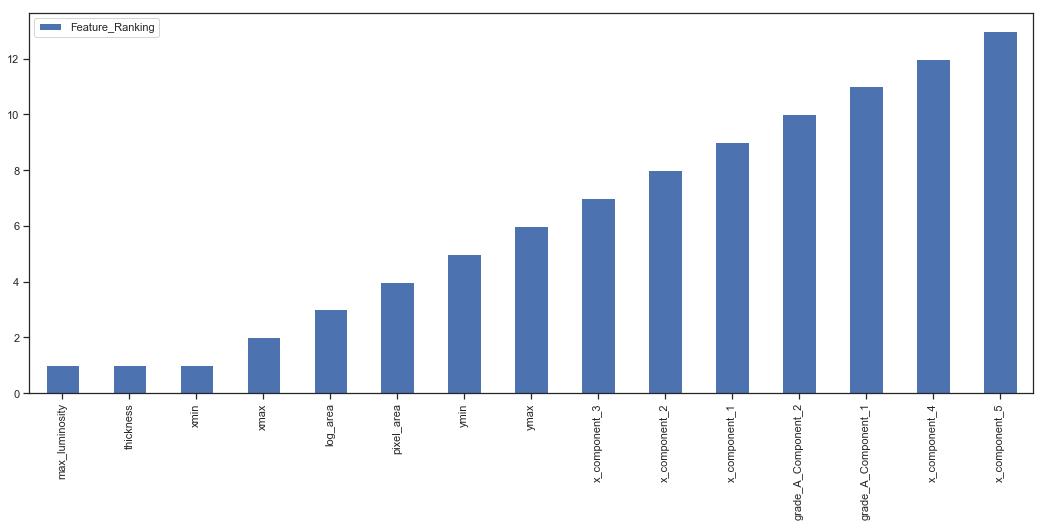

In [28]:
df_feat.sort_values(by="Feature_Ranking").plot(kind='bar', figsize=(18,7))

## 6.2 Importing and Model Fitting

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report


### 6.2.2 Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



Accuracy of Random Forest:  0.8492647058823529
Confusion matrix 
 [[157  25]
 [ 16  74]]
              precision    recall  f1-score   support

           1       0.91      0.86      0.88       182
           2       0.75      0.82      0.78        90

    accuracy                           0.85       272
   macro avg       0.83      0.84      0.83       272
weighted avg       0.85      0.85      0.85       272



In [32]:
#RF On Full data

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf1 = clf.fit(x, y)

### 6.2.4 Adaboost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

#making the instance
model= AdaBoostClassifier()

#Hyper Parameters Set
param_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_adab = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_adab.predict(X_test)

#Check Prediction Score
print("Accuracy of Adaboost Classifier: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


Accuracy of Adaboost Classifier:  0.8382352941176471
Confusion matrix 
 [[158  24]
 [ 20  70]]
              precision    recall  f1-score   support

           1       0.89      0.87      0.88       182
           2       0.74      0.78      0.76        90

    accuracy                           0.84       272
   macro avg       0.82      0.82      0.82       272
weighted avg       0.84      0.84      0.84       272



# Phase2: Applying Model On Test Data

In [34]:
test = pd.read_csv('Test.csv')

test.shape

(583, 15)

In [35]:
test.head(5)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [36]:
test.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5'],
      dtype='object')

In [37]:
test_for_prediction = test[['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5']]

In [47]:
'''test_for_prediction = test[['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results']]'''

In [88]:
'''pol_test_data = polynomial_features.fit_transform(test_for_prediction)'''

In [38]:
#Define predict function

def predict_file(model, model_instance, test_data):
    prediction_var = "prediction_from" + model
    file_name = "Final_output_prediction_from_" + model + ".xlsx"
    prediction_var  = model_instance.predict_proba(test_data)
    df_prediction_var = pd.DataFrame(prediction_var, columns=[1,2])
    df_prediction_var.to_excel(file_name)
    print("{} created.".format(file_name))

In [46]:
predict_file("dt_classifier", best_clf_dt, test_for_prediction)

Final_output_prediction_from_dt_classifier.xlsx created.


In [45]:
predict_file("rf_classifier", best_clf_rf, test_for_prediction)

Final_output_prediction_from_rf_classifier.xlsx created.


In [39]:
predict_file("rf1_classifier", best_clf_rf1, test_for_prediction)

Final_output_prediction_from_rf1_classifier.xlsx created.
